In [13]:
# Task 2:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./A02 Images-20230124/colonies.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

while(1):
    # Using image as cv2 is BGR
    cv2.imshow('Output', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

for i in range(1,5):
    cv2.waitKey(1)

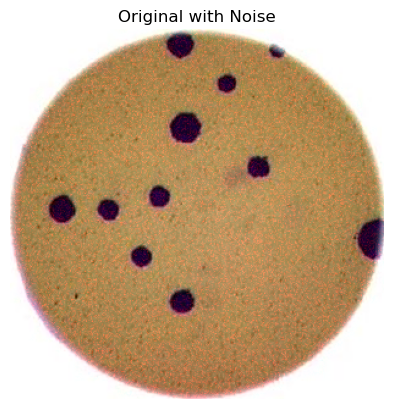

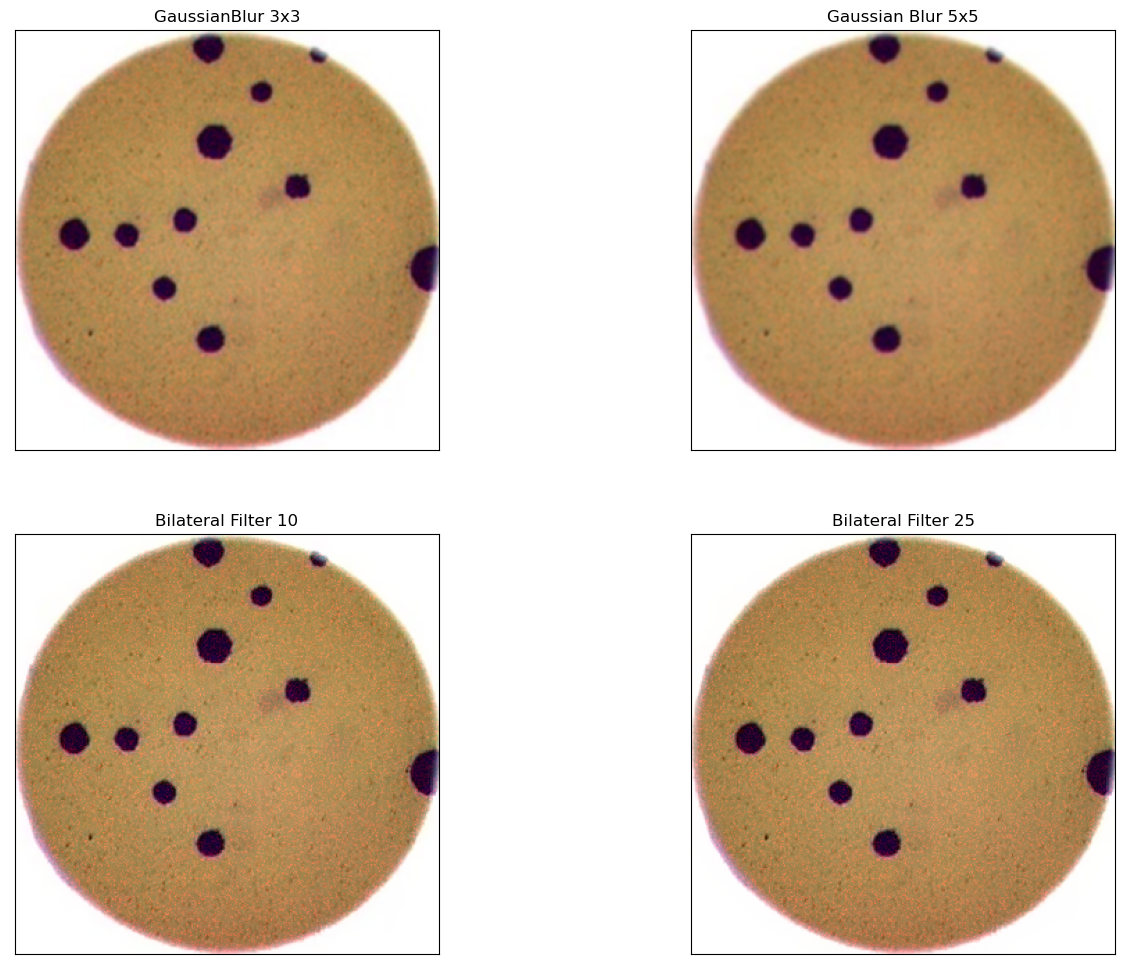

In [14]:
import numpy as np

noise = np.zeros(rgb.shape, np.uint8)
mean = 10
sigma = 30
cv2.randn(noise, mean, sigma)

img_noise = cv2.add(rgb,noise)
plt.imshow(img_noise), plt.title('Original with Noise'), plt.axis(False)
plt.show()

kernel3x3 = (3, 3)
gaussianBlur3x3 = cv2.GaussianBlur(src=img_noise, ksize=kernel3x3, sigmaX=0, sigmaY=0)
kernel5x5 = (5, 5)
gaussianBlur5x5 = cv2.GaussianBlur(src=img_noise, ksize=kernel5x5, sigmaX=0, sigmaY=0)

bilateralFilter10 = cv2.bilateralFilter(img_noise, 10, 9, 75, 75)
bilateralFilter25 = cv2.bilateralFilter(img_noise, 25, 9, 75, 75)

titles = ['GaussianBlur 3x3', 'Gaussian Blur 5x5', 'Bilateral Filter 10', 'Bilateral Filter 25']

images = [gaussianBlur3x3, gaussianBlur5x5, bilateralFilter10, bilateralFilter25]

plt.figure(figsize=(16,12))

for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

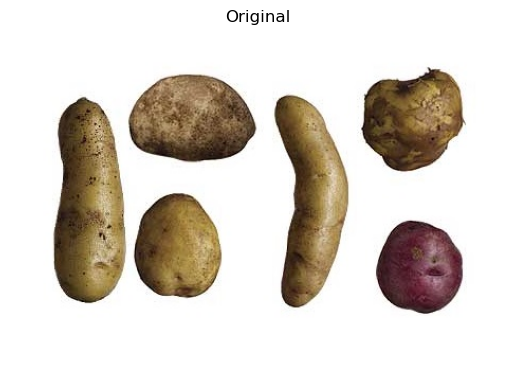

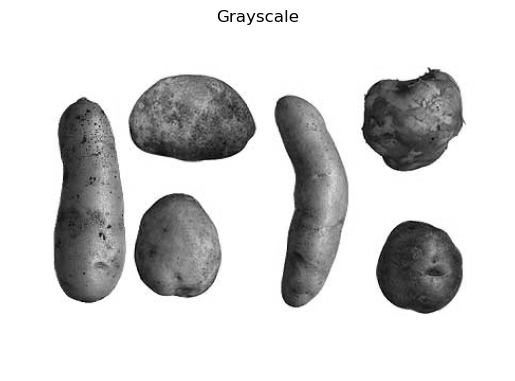

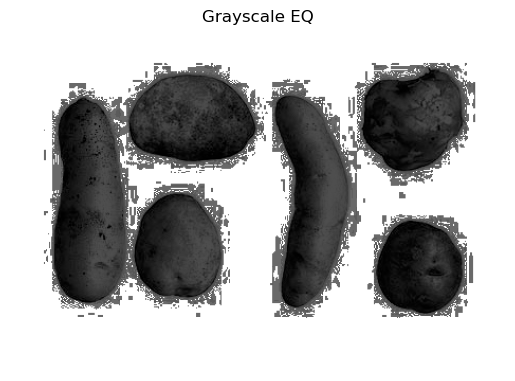

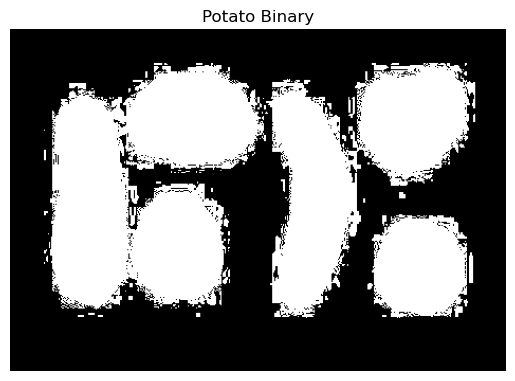

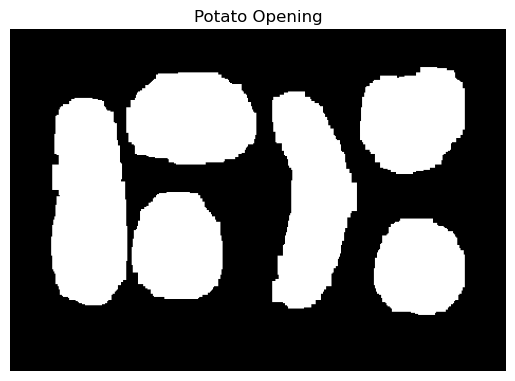

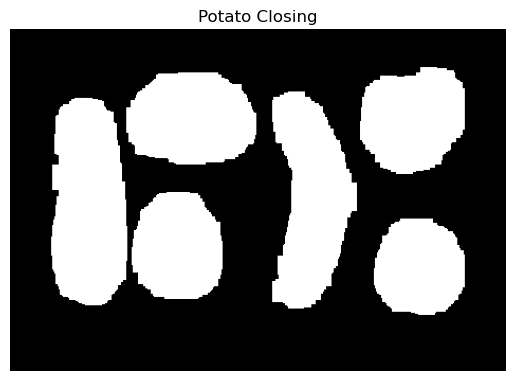

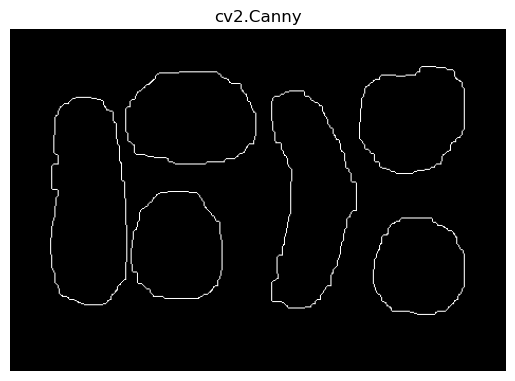

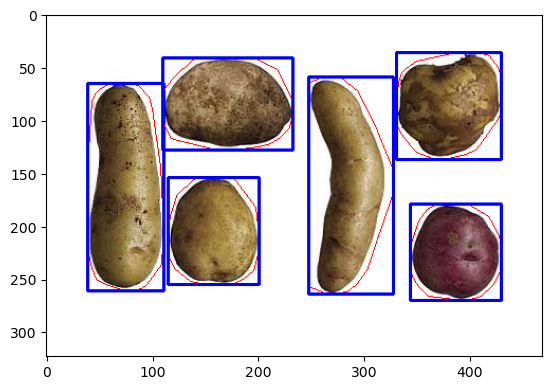

No. of contours =  6
1 : 1.06 (Round)
2 : 1.17 (Elliptical)
3 : 2.72 (Long Cylindrical)
4 : 2.56 (Cylindrical)
5 : 0.71 (Round)
6 : 1.02 (Round)
Average Aspect Ratio: 1.54 (Elliptical)


In [86]:
# Task 3:
# A
potato = cv2.imread('./A02 Images-20230124/potatoes1.jpg')
potatoRGB = cv2.cvtColor(potato, cv2.COLOR_BGR2RGB)

plt.imshow(potatoRGB), plt.title('Original'), plt.axis(False)
plt.show()

# B
potatoGray = cv2.cvtColor(potatoRGB, cv2.COLOR_RGB2GRAY)
plt.imshow(potatoGray, cmap='gray'), plt.title('Grayscale'), plt.axis(False)
plt.show()

# C
potatoEqualised = cv2.equalizeHist(potatoGray)
plt.imshow(potatoEqualised, cmap='gray'), plt.title('Grayscale EQ'), plt.axis(False)
plt.show()

# D
_, binary = cv2.threshold(potatoEqualised, 160, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap='gray'), plt.title('Potato Binary'), plt.axis(False)
plt.show()

# E
#kernel15x15 = (15, 15)
kernel15x15 = np.ones((15,15),np.uint8)
potatoOpenInv = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel15x15)
plt.imshow(potatoOpenInv, cmap='gray'), plt.title('Potato Opening'), plt.axis(False)
plt.show()

# F
#kernelClosing3x3 = (3, 3)
kernelClosing3x3 = np.ones((3,3),np.uint8)
potatoClosed = cv2.morphologyEx(potatoOpenInv, cv2.MORPH_CLOSE, kernelClosing3x3)
plt.imshow(potatoClosed, cmap='gray'), plt.title('Potato Closing'), plt.axis(False)
plt.show()

# G
edges = cv2.Canny(potatoClosed,100,200)
plt.imshow(edges, cmap='gray'), plt.title('cv2.Canny'), plt.axis(False)
plt.show()

# H
contours, hierarchy = cv2.findContours(potatoClosed, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# I
shapeList = []
count = 0

# Function:
def listAppend(width, height):
    n = height/width
    n = round(n, 2)
    shapeList.append(n)

for c in contours:
    area = cv2.contourArea(c)
    if area > 3 and area < 15000:
        hull = cv2.convexHull(c)
        cv2.drawContours(potatoRGB, [hull], 0, (255,0,0))
        x,y,w,h = cv2.boundingRect(c)
        listAppend(w,h)
        cv2.rectangle(potatoRGB, (x, y), (x + w, y + h), (0,0,255), 2)
        count+=1

plt.imshow(potatoRGB)
plt.show()
print("No. of contours = ", count)

count = 1
for potato in shapeList:
    if potato >= 2.6:
        print(count, ":", potato, "(Long Cylindrical)")
    elif potato >= 2.1 and potato < 2.6:
        print(count, ":", potato, "(Cylindrical)")
    elif potato >=1.1 and potato < 2.1:
        print(count, ":", potato, "(Elliptical)")
    elif potato < 1.1:
        print(count, ":", potato, "(Round)")
    count+=1

avg = sum(shapeList) / len(shapeList)
avg = round(avg, 2)
if avg >= 2.6:
    print("Average Aspect Ratio:", avg, "(Long Cylindrical)")
elif avg >= 2.1 and avg < 2.6:
    print("Average Aspect Ratio:", avg, "(Cylindrical)")
elif avg >=1.1 and avg < 2.1:
    print("Average Aspect Ratio:", avg, "(Elliptical)")
elif avg < 1.1:
    print("Average Aspect Ratio:", avg, "(Round)")
